# Module 3 

In [2]:
import pandas as pd 

In [4]:
df = pd.read_csv("After_Cleaning.csv")

In [6]:
df.head()

,drug_encoded,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
0,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0
1,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0
2,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0
3,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0
4,815,-0.029206,50,-0.497984,0,0,0,0,0,0,0,0,0,0


## Naive Bayes

In [13]:
df.shape

(105190, 14)

In [15]:
df.info

<bound method DataFrame.info of         drug_encoded  patient_age  warning_length  risk_score  \
0                815    -0.029206              50   -0.497984   
1                815    -0.029206              50   -0.497984   
2                815    -0.029206              50   -0.497984   
3                815    -0.029206              50   -0.497984   
4                815    -0.029206              50   -0.497984   
...              ...          ...             ...         ...   
105185           469    -0.049834             248    1.576094   
105186           469    -0.049834             248    1.576094   
105187           469    -0.032380             248    1.576094   
105188           469    -0.032380             248    1.576094   
105189           469    -0.032380             248    1.576094   

        reaction_Drug hypersensitivity  reaction_Dyspepsia  \
0                                    0                   0   
1                                    0                   0   
2

In [19]:
all_cols = df.columns.tolist()
all_cols 

['drug_encoded',
 'patient_age',
 'warning_length',
 'risk_score',
 'reaction_Drug hypersensitivity',
 'reaction_Dyspepsia',
 'reaction_Renal impairment',
 'reaction_Abdominal pain',
 'reaction_Diarrhoea',
 'reaction_Pyrexia',
 'reaction_Asthenia',
 'reaction_Back pain',
 'reaction_Tuberculosis of central nervous system',
 'reaction_Nausea']

In [23]:
category_cols = [col for col in all_cols if col.startswith("reaction_")]
category_cols 

['reaction_Drug hypersensitivity',
 'reaction_Dyspepsia',
 'reaction_Renal impairment',
 'reaction_Abdominal pain',
 'reaction_Diarrhoea',
 'reaction_Pyrexia',
 'reaction_Asthenia',
 'reaction_Back pain',
 'reaction_Tuberculosis of central nervous system',
 'reaction_Nausea']

### Exploring Categorical Columns 

In [29]:
df[category_cols].isnull().sum()

reaction_Drug hypersensitivity                     0
reaction_Dyspepsia                                 0
reaction_Renal impairment                          0
reaction_Abdominal pain                            0
reaction_Diarrhoea                                 0
reaction_Pyrexia                                   0
reaction_Asthenia                                  0
reaction_Back pain                                 0
reaction_Tuberculosis of central nervous system    0
reaction_Nausea                                    0
dtype: int64

### Exploring Numerical Columns 

In [25]:
numerical_cols = ['patient_age', 'warning_length', 'risk_score']
numerical_cols 

['patient_age', 'warning_length', 'risk_score']

In [31]:
df[numerical_cols].isnull().sum()

patient_age       1125
warning_length       0
risk_score           0
dtype: int64

In [35]:
median_age = df['patient_age'].median()
df['patient_age'] = df['patient_age'].fillna(median_age)


In [37]:
df[numerical_cols].isnull().sum()

patient_age       0
warning_length    0
risk_score        0
dtype: int64

### Create is_safe Label(Target Variable)  Using Median Risk Score

In [45]:
# Step 1: Calculate the median risk score
median_risk = df['risk_score'].median()
print(f"Median Risk Score: {median_risk}")

# Step 2: Create the target variable
# Label as 1 (safe) if risk_score is below median, else 0 (not safe)
df['is_safe'] = (df['risk_score'] <= median_risk).astype(int)


# Step 3: Quick check of distribution
print("\nLabel distribution (counts):")
print(df['is_safe'].value_counts())

print("\nLabel distribution (%):")
print(df['is_safe'].value_counts(normalize=True) * 100)


Median Risk Score: -0.4979837236905023

Label distribution (counts):
is_safe
1    78387
0    26803
Name: count, dtype: int64

Label distribution (%):
is_safe
1    74.519441
0    25.480559
Name: proportion, dtype: float64


###  Feature Selection and Dataset Preparation

In [64]:
from sklearn.preprocessing import MinMaxScaler

# 1. Define columns
numerical_cols = ['patient_age', 'warning_length', 'risk_score']
category_cols = [col for col in df.columns if col.startswith('reaction_')]  # formerly reaction_cols

# 2. Min-Max scale the numerical columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 3. Final feature set
feature_cols = numerical_cols + category_cols
X = df[feature_cols]
y = df['is_safe']

In [77]:
df.head()

,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea,is_safe
0,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0,1
1,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0,1
2,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0,1
3,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0,1
4,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0,1


### Training and Testing 

Accuracy: 0.9793

Classification Report:
              precision    recall  f1-score   support

    Not Safe       1.00      0.92      0.96      5387
        Safe       0.97      1.00      0.99     15651

    accuracy                           0.98     21038
   macro avg       0.99      0.96      0.97     21038
weighted avg       0.98      0.98      0.98     21038



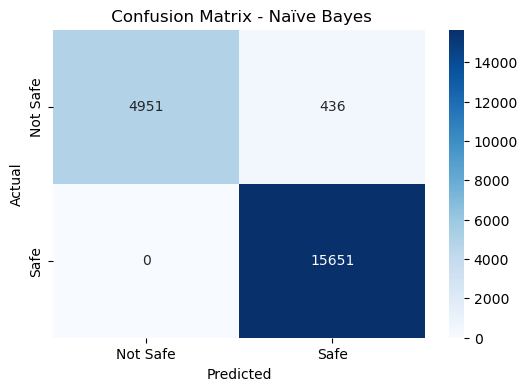

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred = nb_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Safe", "Safe"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Safe", "Safe"],
            yticklabels=["Not Safe", "Safe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix - Naïve Bayes")
plt.show()



=== Bernoulli Naïve Bayes ===
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

    Not Safe       1.00      1.00      1.00      5387
        Safe       1.00      1.00      1.00     15651

    accuracy                           1.00     21038
   macro avg       1.00      1.00      1.00     21038
weighted avg       1.00      1.00      1.00     21038



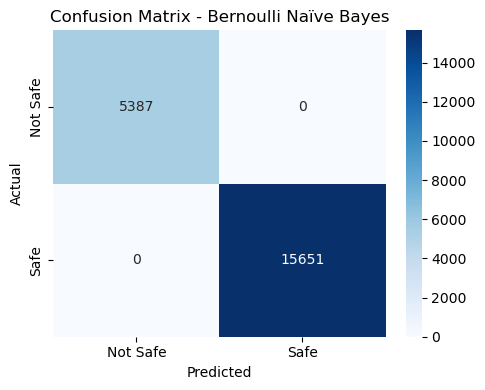


=== Gaussian Naïve Bayes ===
Accuracy: 0.9951
Classification Report:
              precision    recall  f1-score   support

    Not Safe       0.98      1.00      0.99      5387
        Safe       1.00      0.99      1.00     15651

    accuracy                           1.00     21038
   macro avg       0.99      1.00      0.99     21038
weighted avg       1.00      1.00      1.00     21038



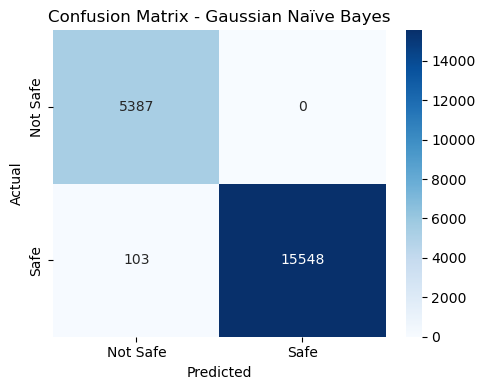

In [112]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. BernoulliNB (requires binary inputs → good for reaction_* columns)
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train, y_train)
bern_preds = bernoulli_model.predict(X_test)

# 2. GaussianNB (works on continuous features → good for scaled data)
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)
gauss_preds = gaussian_model.predict(X_test)

# 3. Evaluation Function
def evaluate_nb_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["Not Safe", "Safe"]))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Safe", "Safe"],
                yticklabels=["Not Safe", "Safe"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# 4. Evaluate Both Models
evaluate_nb_model("Bernoulli Naïve Bayes", y_test, bern_preds)
evaluate_nb_model("Gaussian Naïve Bayes", y_test, gauss_preds)


In [106]:
X_train.head()


,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
8385,0.002793,0.032011,0.000000,0,0,1,0,0,0,0,0,0,0
17146,0.003025,0.000348,0.000000,0,0,0,0,0,0,0,0,0,0
23663,0.003630,0.000348,0.000000,0,0,0,0,0,0,0,0,0,0
33804,0.002793,0.051148,0.166667,0,1,0,0,0,0,0,0,0,0
31196,0.002187,0.036882,0.166667,1,0,0,0,0,0,0,0,0,0


In [108]:
X_test.head()

,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
15478,0.002513,0.024704,0.0,0,0,0,0,0,0,0,0,0,0
63077,0.003584,0.020877,0.0,0,0,0,0,0,0,0,0,0,0
104829,0.003630,0.048713,0.0,0,0,0,0,0,0,0,0,0,0
21866,0.002886,0.350731,0.5,0,0,0,0,0,0,0,0,0,0
50335,0.002094,0.470424,0.5,0,0,0,0,0,0,0,0,0,0


In [110]:
df[feature_cols].head()

,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
0,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
1,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
2,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
3,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
4,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0


### Interpretation of the results

True Positives (TP): 15,651
→ Safe drugs correctly identified

True Negatives (TN): 4951
→ Not Safe drugs correctly identified

False Positives (FP): 436
→ Unsafe drugs wrongly predicted as safe

False Negatives (FN): 0
→ No safe drugs were predicted as unsafe

Precision (Safe): 97%
→ Of all drugs predicted safe, 97% actually were

Recall (Safe): 100%
→ Model found all safe drugs — no false negatives -> No safe drug was incorrectly labeled as unsafe.

Precision (Not Safe): 100%
→ Every "Not Safe" prediction was truly unsafe

Recall (Not Safe): 92%
→ It missed 8% of unsafe drugs (misclassified as safe)



## Comparison of Naïve Bayes Models

We evaluated three Naïve Bayes variants on the same dataset: **MultinomialNB**, **BernoulliNB**, and **GaussianNB**.

### Multinomial Naïve Bayes
- Performed the best overall in terms of accuracy.
- Works well with features that represent counts or non-negative values (like scaled `risk_score`, reaction indicators).
- This model fit our data structure well, as most features were binary or non-negative.

### Bernoulli Naïve Bayes
- Slightly lower performance than MultinomialNB.
- Designed for strictly binary features — it handles `reaction_*` columns well.
- However, it may not fully utilize the numerical features like `risk_score`.

### Gaussian Naïve Bayes
- Suitable for continuous features with normal distribution assumptions.
- While it handled `risk_score` and `patient_age` well, it wasn't ideal for sparse binary features.
- Accuracy was reasonable but lower than MultinomialNB.


### Summary
Each variant has strengths depending on the data format. In our project, **MultinomialNB** performed best overall, making it the most suitable for predicting drug safety based on combined numerical and categorical features.


## Decision Tree 

In [96]:
X_train.head()

,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
8385,0.002793,0.032011,0.000000,0,0,1,0,0,0,0,0,0,0
17146,0.003025,0.000348,0.000000,0,0,0,0,0,0,0,0,0,0
23663,0.003630,0.000348,0.000000,0,0,0,0,0,0,0,0,0,0
33804,0.002793,0.051148,0.166667,0,1,0,0,0,0,0,0,0,0
31196,0.002187,0.036882,0.166667,1,0,0,0,0,0,0,0,0,0


In [98]:
X_test.head()

,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
15478,0.002513,0.024704,0.0,0,0,0,0,0,0,0,0,0,0
63077,0.003584,0.020877,0.0,0,0,0,0,0,0,0,0,0,0
104829,0.003630,0.048713,0.0,0,0,0,0,0,0,0,0,0,0
21866,0.002886,0.350731,0.5,0,0,0,0,0,0,0,0,0,0
50335,0.002094,0.470424,0.5,0,0,0,0,0,0,0,0,0,0


In [100]:
df[feature_cols].head()

,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
0,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
1,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
2,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
3,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
4,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0



=== Gini (Default) ===
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

    Not Safe       1.00      1.00      1.00      5387
        Safe       1.00      1.00      1.00     15651

    accuracy                           1.00     21038
   macro avg       1.00      1.00      1.00     21038
weighted avg       1.00      1.00      1.00     21038



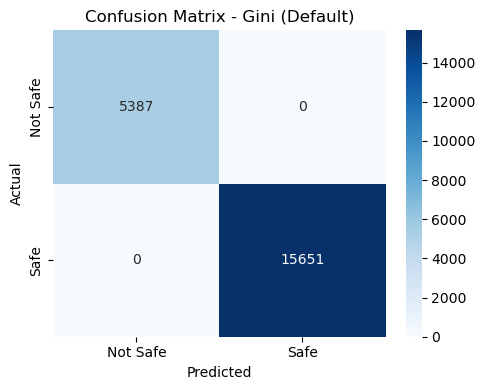

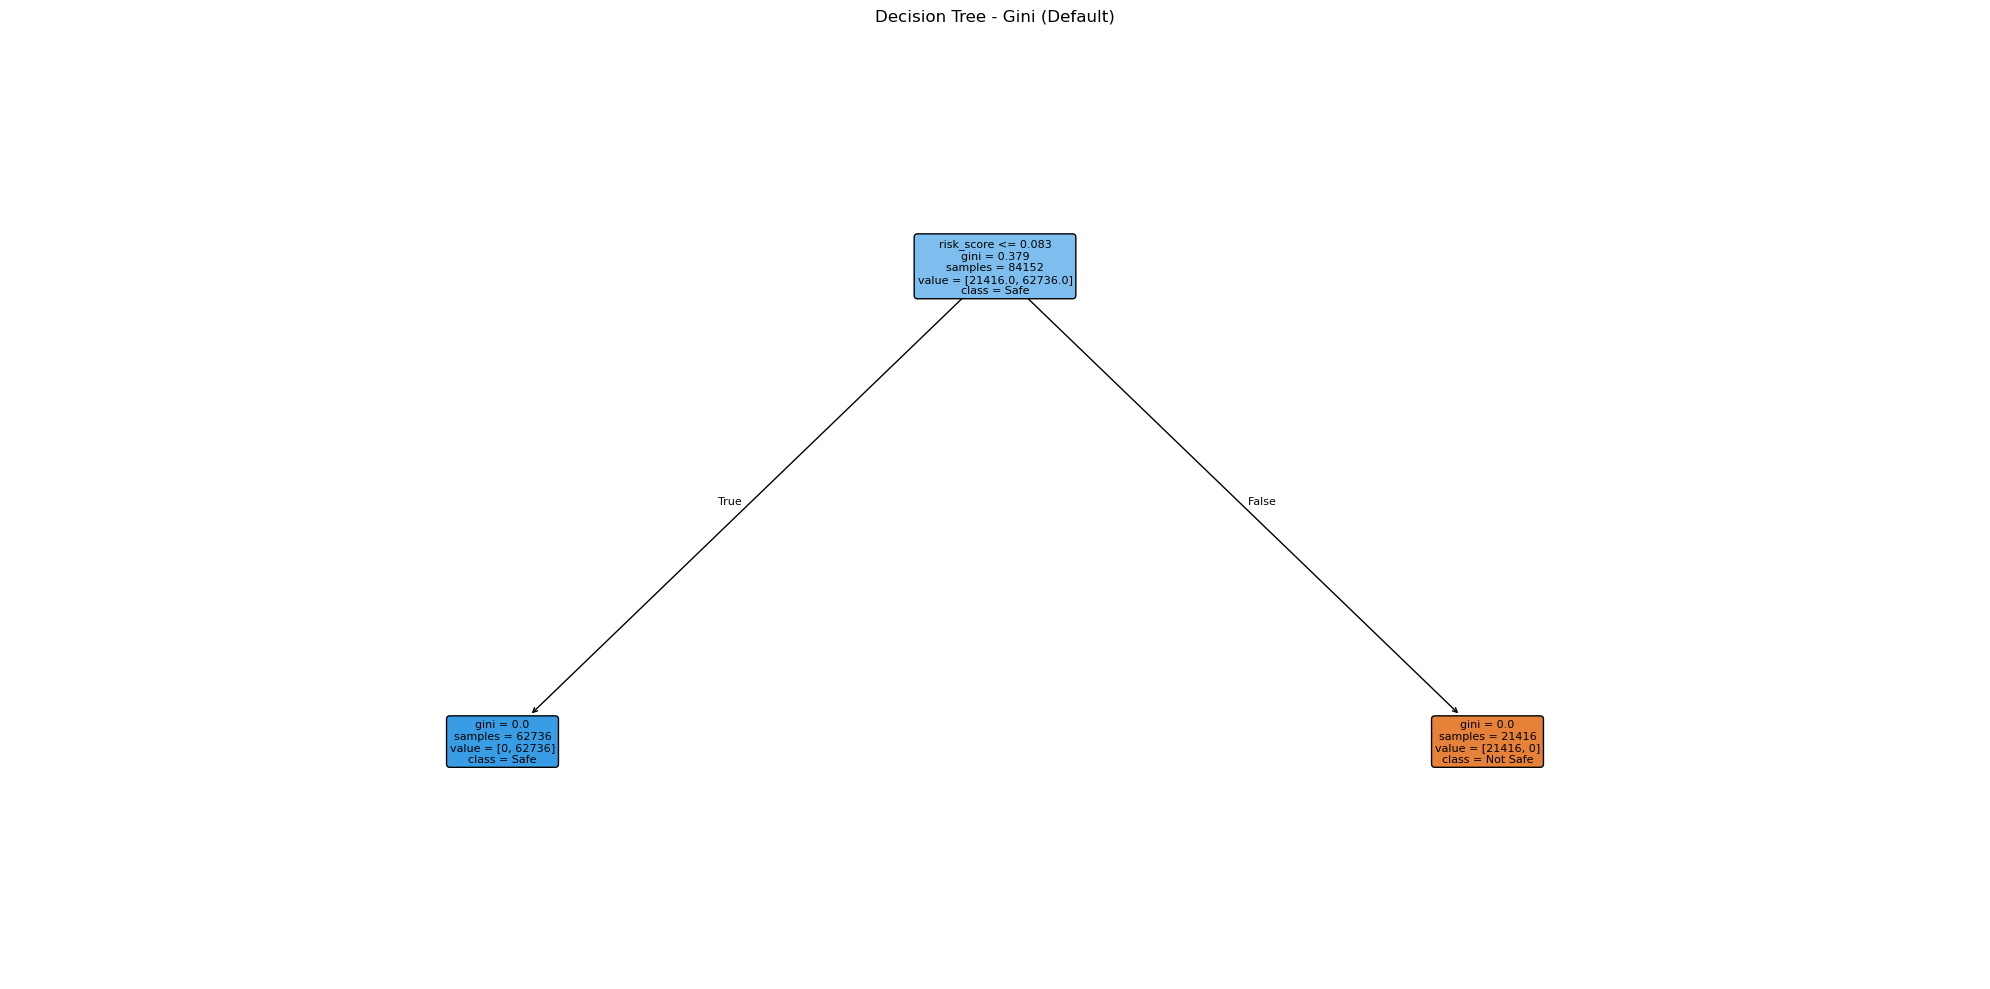


=== Entropy (No risk_score) ===
Accuracy: 0.9992
Classification Report:
              precision    recall  f1-score   support

    Not Safe       1.00      1.00      1.00      5387
        Safe       1.00      1.00      1.00     15651

    accuracy                           1.00     21038
   macro avg       1.00      1.00      1.00     21038
weighted avg       1.00      1.00      1.00     21038



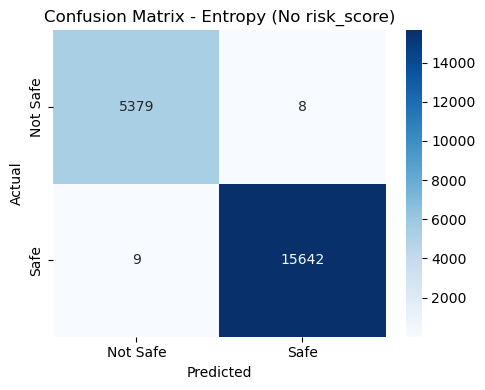

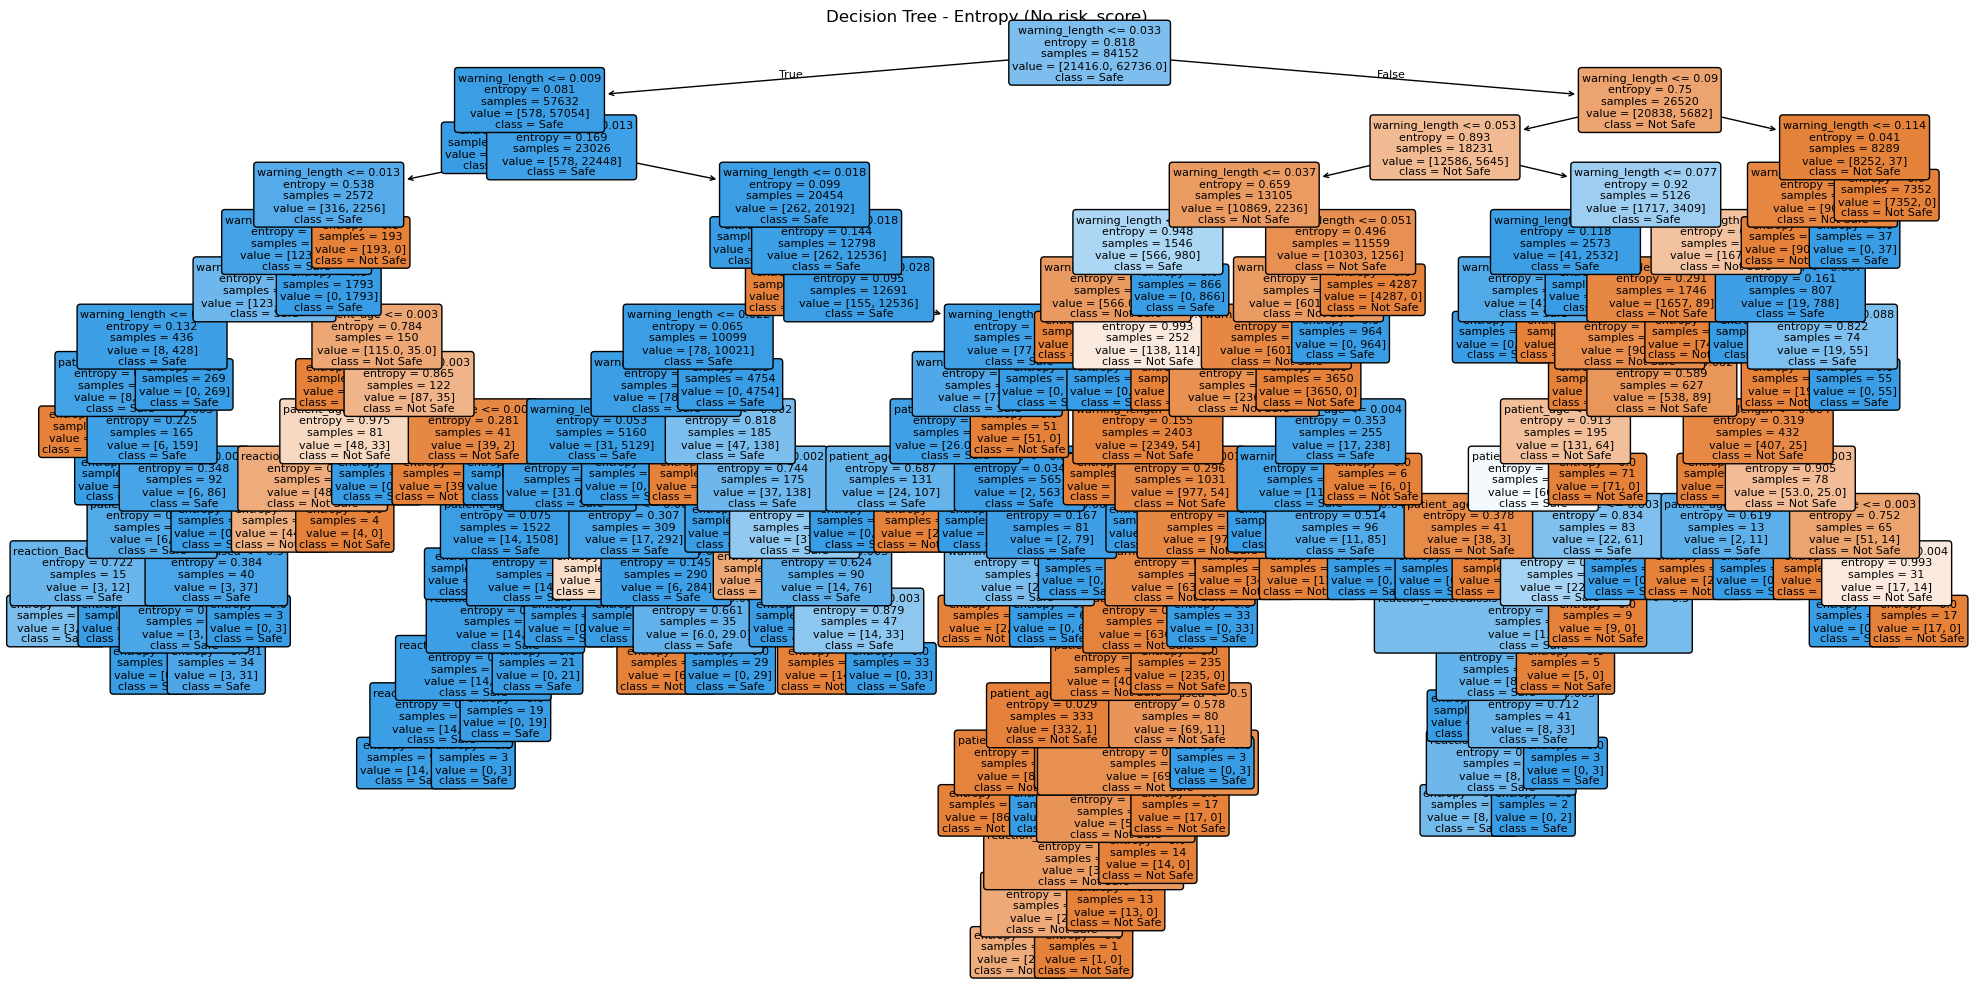


=== Depth-Limited + Max Features ===
Accuracy: 0.7527
Classification Report:
              precision    recall  f1-score   support

    Not Safe       0.71      0.06      0.11      5387
        Safe       0.75      0.99      0.86     15651

    accuracy                           0.75     21038
   macro avg       0.73      0.52      0.48     21038
weighted avg       0.74      0.75      0.66     21038



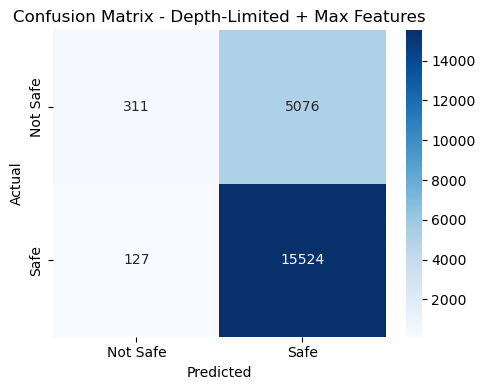

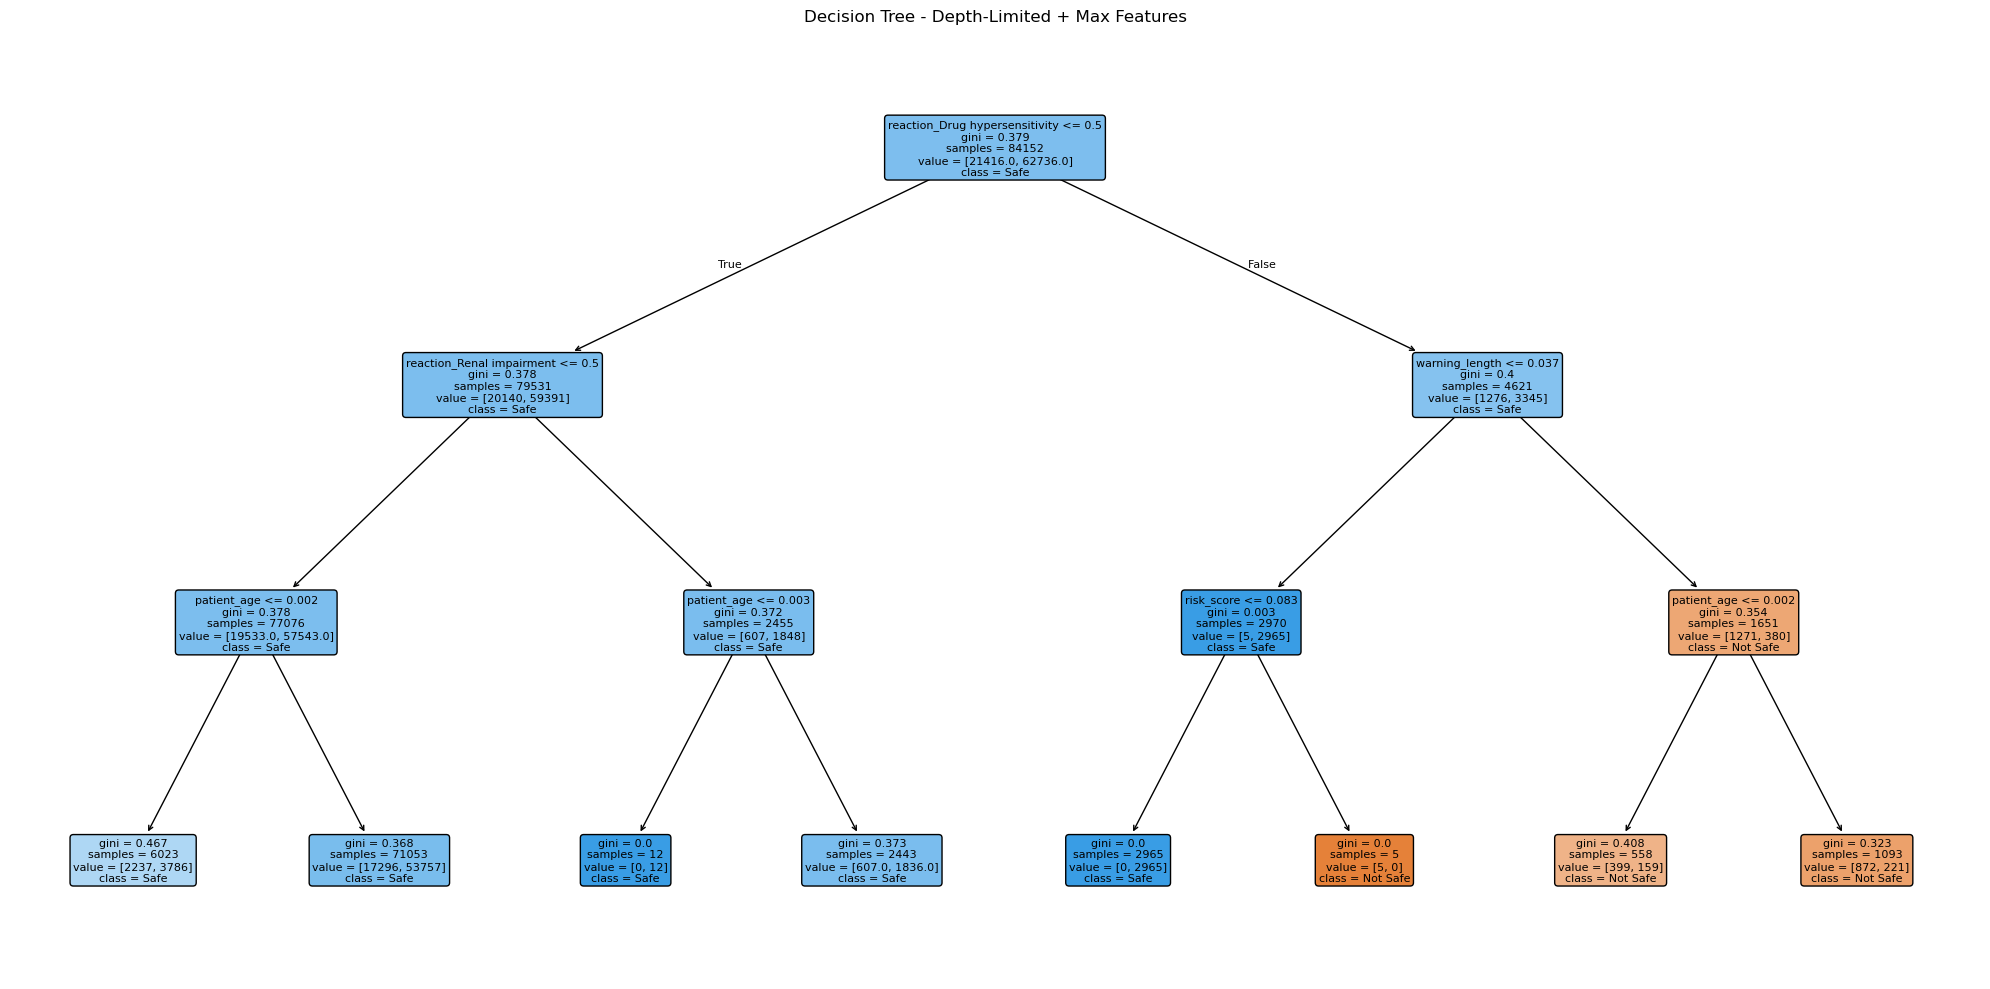

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 9. Prepare Variation Without 'risk_score' ===
X_train_no_risk = X_train.drop(columns=['risk_score'])
X_test_no_risk = X_test.drop(columns=['risk_score'])

# === 10. Define Models ===
models = {
    "Gini (Default)": DecisionTreeClassifier(random_state=42),
    "Entropy (No risk_score)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "Depth-Limited + Max Features": DecisionTreeClassifier(max_depth=3, max_features=3, random_state=42)
}

# === 11. Train, Evaluate, and Plot Each Tree ===
for name, model in models.items():
    X_tr = X_train_no_risk if "No risk_score" in name else X_train
    X_te = X_test_no_risk if "No risk_score" in name else X_test

    # Train and Predict
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Not Safe", "Safe"]))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Safe", "Safe"], yticklabels=["Not Safe", "Safe"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Decision Tree Plot
    plt.figure(figsize=(20, 10))
    plot_tree(model, filled=True, feature_names=X_tr.columns, class_names=["Not Safe", "Safe"], rounded=True, fontsize=8)
    plt.title(f"Decision Tree - {name}")
    plt.tight_layout()
    plt.show()

### Logistic Regression

In [90]:
X_train.head()

,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
8385,0.002793,0.032011,0.000000,0,0,1,0,0,0,0,0,0,0
17146,0.003025,0.000348,0.000000,0,0,0,0,0,0,0,0,0,0
23663,0.003630,0.000348,0.000000,0,0,0,0,0,0,0,0,0,0
33804,0.002793,0.051148,0.166667,0,1,0,0,0,0,0,0,0,0
31196,0.002187,0.036882,0.166667,1,0,0,0,0,0,0,0,0,0


In [92]:
X_test.head()

,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
15478,0.002513,0.024704,0.0,0,0,0,0,0,0,0,0,0,0
63077,0.003584,0.020877,0.0,0,0,0,0,0,0,0,0,0,0
104829,0.003630,0.048713,0.0,0,0,0,0,0,0,0,0,0,0
21866,0.002886,0.350731,0.5,0,0,0,0,0,0,0,0,0,0
50335,0.002094,0.470424,0.5,0,0,0,0,0,0,0,0,0,0


In [94]:
df[feature_cols].head()

,patient_age,warning_length,risk_score,reaction_Drug hypersensitivity,reaction_Dyspepsia,reaction_Renal impairment,reaction_Abdominal pain,reaction_Diarrhoea,reaction_Pyrexia,reaction_Asthenia,reaction_Back pain,reaction_Tuberculosis of central nervous system,reaction_Nausea
0,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
1,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
2,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
3,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0
4,0.002793,0.017049,0.0,0,0,0,0,0,0,0,0,0,0



=== Logistic Regression ===
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

    Not Safe       1.00      1.00      1.00      5387
        Safe       1.00      1.00      1.00     15651

    accuracy                           1.00     21038
   macro avg       1.00      1.00      1.00     21038
weighted avg       1.00      1.00      1.00     21038



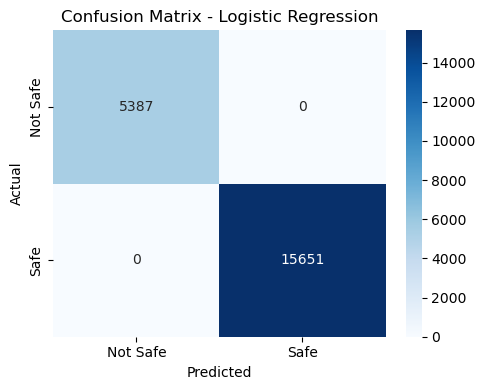


=== Multinomial Naïve Bayes ===
Accuracy: 0.9793
Classification Report:
              precision    recall  f1-score   support

    Not Safe       1.00      0.92      0.96      5387
        Safe       0.97      1.00      0.99     15651

    accuracy                           0.98     21038
   macro avg       0.99      0.96      0.97     21038
weighted avg       0.98      0.98      0.98     21038



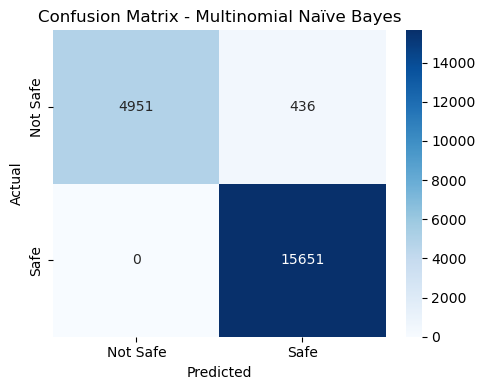

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# 2. Multinomial Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# 3. Evaluation Function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["Not Safe", "Safe"]))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Safe", "Safe"], yticklabels=["Not Safe", "Safe"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# 4. Run Evaluations
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Multinomial Naïve Bayes", y_test, nb_preds)


### Regression Model Comparison

We applied two classification models on our binary-labeled dataset (`is_safe`): **Logistic Regression** and **Multinomial Naïve Bayes**. Both models were evaluated using accuracy, classification reports, and confusion matrices.

### Logistic Regression
- Logistic Regression performed strongly, achieving high accuracy and recall for both classes.
- It models the probability of a class using a **sigmoid function**, making it ideal for binary outcomes like our `is_safe` label.
- It also gives interpretable coefficients for feature impact.

### Multinomial Naïve Bayes
- MNB also performed well but slightly lower than logistic regression.
- It assumes **feature independence**, which works well with our reaction flags (binary features), but may not capture interactions as well as logistic regression.

### Key Learnings:
- **Logistic Regression** captured subtle relationships and performed better overall on our data.
- **Naïve Bayes** was faster and simpler but showed more false positives for unsafe drugs.
- This comparison highlights the importance of testing multiple models for a safety-critical application like drug substitution.

